### Final Project
# Classification of Clothing Motifs

--------------------
```
Hafara Firdausi (05111950010040)
Digital Image Processing
```

## 1. Description
### 1.1 Purpose

Automatically classifies clothes based on their motif rather than manually input categories in the online shop.

### 1.2 Methodology

![](method.png)


## 2. Steps
### 2.1 Import Libraries

In [1]:
# import required libraries

import numpy as np # for numerical computations
import pandas as pd # for dataframe operations

from matplotlib import pyplot as plt #for viewing images and plots
%matplotlib inline 

import cv2   #For image processing

from sklearn.preprocessing import LabelEncoder       #For encoding categorical variables
from sklearn.model_selection import train_test_split #For splitting of dataset

#All tensorflow utilities for creating, training and working with a CNN
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

### 2.2 Import and Prepare Dataset
The dataset used is Fashion Dataset from **Kaggle**, containing **15000 images with various dress categories**. All images from real fashion photos. So, there is a lot of background noise. But the dresses in the images have been **tagged over by red rectangles**.

In [2]:
# define dataset file
# I only use 10,000 data
dataset = "dress-10k.csv"

# import the dataset
df = pd.read_csv(dataset)
df.head(10)

_unit_id   category  category:confidence  \
0  851505458       ikat               0.3487   
1  851505459      plain               1.0000   
2  851505460  polka dot               0.6709   
3  851505461      plain               1.0000   
4  851505462   geometry               0.7035   
5  851505463   geometry               0.6585   
6  851505464      plain               1.0000   
7  851505465      plain               1.0000   
8  851505466     floral               1.0000   
9  851505467      plain               1.0000   

                                           image_url  
0  http://s3-eu-west-1.amazonaws.com/we-attribute...  
1  http://s3-eu-west-1.amazonaws.com/we-attribute...  
2  http://s3-eu-west-1.amazonaws.com/we-attribute...  
3  http://s3-eu-west-1.amazonaws.com/we-attribute...  
4  http://s3-eu-west-1.amazonaws.com/we-attribute...  
5  http://s3-eu-west-1.amazonaws.com/we-attribute...  
6  http://s3-eu-west-1.amazonaws.com/we-attribute...  
7  http://s3-eu-west-1.amazonaws.com/we-attribute...  
8  http://s3-eu-west-1.amazonaws.com/we-attribute...  
9  http://s3-eu-west-1.amazonaws.com/we-attribute...

In [3]:
len(df)

10003

In [4]:
# download all images

# import wget
# import os
# import pandas as pd #for dataframe operations

# # define 
# dataset_dir = "dress-10k.csv"
# img_dir = "img"

# # import the dataset
# df = pd.read_csv(dataset_dir)
# df.head(10)

# # make directory
# if not os.path.exists(img_dir):
#     os.makedirs(img_dir)
    
# for url in df['image_url'] :
#     local_file = wget.download(url, img_dir)
#     print(local_file)

In [5]:
# convert image url to image path
img_path = []
img_dir = "img/"

for url in df['image_url'] :
    new_path = img_dir + url.split('/')[-1]
    img_path.append(new_path)

df['img_path'] = img_path

In [6]:
df.head(10)

_unit_id   category  category:confidence  \
0  851505458       ikat               0.3487   
1  851505459      plain               1.0000   
2  851505460  polka dot               0.6709   
3  851505461      plain               1.0000   
4  851505462   geometry               0.7035   
5  851505463   geometry               0.6585   
6  851505464      plain               1.0000   
7  851505465      plain               1.0000   
8  851505466     floral               1.0000   
9  851505467      plain               1.0000   

                                           image_url  \
0  http://s3-eu-west-1.amazonaws.com/we-attribute...   
1  http://s3-eu-west-1.amazonaws.com/we-attribute...   
2  http://s3-eu-west-1.amazonaws.com/we-attribute...   
3  http://s3-eu-west-1.amazonaws.com/we-attribute...   
4  http://s3-eu-west-1.amazonaws.com/we-attribute...   
5  http://s3-eu-west-1.amazonaws.com/we-attribute...   
6  http://s3-eu-west-1.amazonaws.com/we-attribute...   
7  http://s3-eu-west-1.amazonaws.com/we-attribute...   
8  http://s3-eu-west-1.amazonaws.com/we-attribute...   
9  http://s3-eu-west-1.amazonaws.com/we-attribute...   

                                       img_path  
0  img/5f635c0fa59f4270a6953f67dcddcda3.jpg.png  
1  img/ca5ca27caca94f9fb0617c226477ae35.jpg.png  
2  img/7be73e354249484db5a8ddf4e05cc63b.jpg.png  
3  img/7e241481162649d39048f522d0653e03.jpg.png  
4  img/808d0bf9fe9745fca13ab461f86e0e4e.jpg.png  
5  img/239faf3c69e44268ba411a91afd8ca98.jpg.png  
6  img/c6e22692f9b6430a87958f30b77d3f4a.jpg.png  
7  img/f6ca6990ff064c19b53df16917011779.jpg.png  
8  img/219b291464e445ec842fe325951d8159.jpg.png  
9  img/626a1559902f46ba9c9cbd2f80ba5abf.jpg.png

In [7]:
# drop "image_url" column
df.drop("image_url", axis=1, inplace=True)

In [8]:
df.head(10)

_unit_id   category  category:confidence  \
0  851505458       ikat               0.3487   
1  851505459      plain               1.0000   
2  851505460  polka dot               0.6709   
3  851505461      plain               1.0000   
4  851505462   geometry               0.7035   
5  851505463   geometry               0.6585   
6  851505464      plain               1.0000   
7  851505465      plain               1.0000   
8  851505466     floral               1.0000   
9  851505467      plain               1.0000   

                                       img_path  
0  img/5f635c0fa59f4270a6953f67dcddcda3.jpg.png  
1  img/ca5ca27caca94f9fb0617c226477ae35.jpg.png  
2  img/7be73e354249484db5a8ddf4e05cc63b.jpg.png  
3  img/7e241481162649d39048f522d0653e03.jpg.png  
4  img/808d0bf9fe9745fca13ab461f86e0e4e.jpg.png  
5  img/239faf3c69e44268ba411a91afd8ca98.jpg.png  
6  img/c6e22692f9b6430a87958f30b77d3f4a.jpg.png  
7  img/f6ca6990ff064c19b53df16917011779.jpg.png  
8  img/219b291464e445ec842fe325951d8159.jpg.png  
9  img/626a1559902f46ba9c9cbd2f80ba5abf.jpg.png

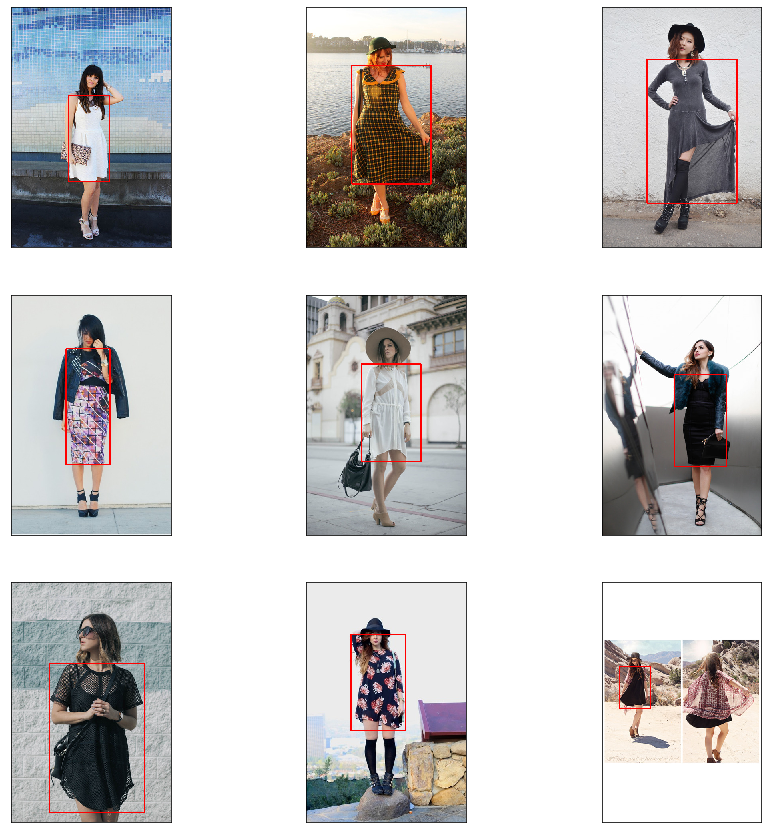

In [9]:
# display some images
fig = plt.figure(figsize=(15, 15))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    img = cv2.imread(df['img_path'].loc[i])[:,:,::-1]
    fig.add_subplot(rows, columns, i)
    plt.xticks([]), plt.yticks([])
    plt.imshow(img)
plt.show()

In [10]:
# list unique categories
print('All categories : \n ')
for category in df['category'].unique():
    print(category)
    
print('\n ')

# total of unique categories
n_classes = df['category'].nunique()
print('Total number of unique categories:', n_classes)

All categories : 
 
ikat
plain
polka dot
geometry
floral
squares
scales
animal
OTHER
stripes
tribal
houndstooth
cartoon
chevron
stars
letter_numb
skull

 
Total number of unique categories: 17


In [11]:
# remove the category 'OTHER' from the dataset
df = df.loc[(df['category'] != 'OTHER')].reset_index(drop=True)

### 2.3 Preprocess Image
### 2.3.1 Masking
**Image masking** is the process of separating an image from its background, either to cause the image to stand out on its own or to place the image over another background. This process used to **separate red rectangles** from the whole image.

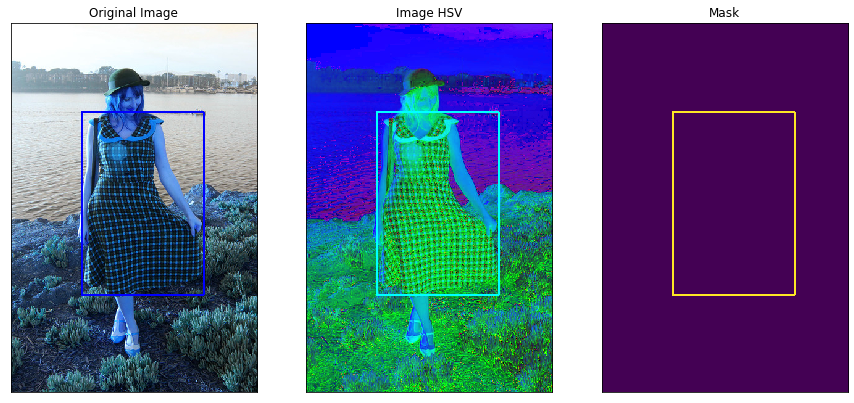

In [12]:
test_img = df['img_path'].loc[2]

# original image
image = cv2.imread(test_img)

# convert to HSV for creating a mask
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# create a mask that detects the red rectangular tags present in each image
mask = cv2.inRange(image_hsv, (0,255,255), (0,255,255))

plt.figure(figsize=(15, 15))
plt.subplot(1,3,1), plt.imshow(image),plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2), plt.imshow(image_hsv),plt.title('Image HSV')
plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3), plt.imshow(mask),plt.title('Mask')
plt.xticks([]), plt.yticks([])
plt.show()

In [13]:
# get the coordinates of the red rectangle in the image

if len(np.where(mask != 0)[0]) != 0:
    y1 = min(np.where(mask != 0)[0])
    y2 = max(np.where(mask != 0)[0])
else:
    y1 = 0                                     
    y2 = len(mask)

if len(np.where(mask != 0)[1]) != 0:
    x1 = min(np.where(mask != 0)[1])
    x2 = max(np.where(mask != 0)[1])
else:
    x1 = 0
    x2 = len(mask[0])
    
print("y1 : {}\ny2 : {}\nx1 : {}\nx2 : {}".format(y1, y2, x1, x2))    

y1 : 145
y2 : 443
x1 : 113
x2 : 313


### 2.3.2 Median Filtering (Image Enhancement)
**Median Filter** is a non-linear digital filtering technique, often used to remove noise from an image or signal. Such noise reduction is a typical pre-processing step to improve the results of later processing (for example, edge detection on an image).

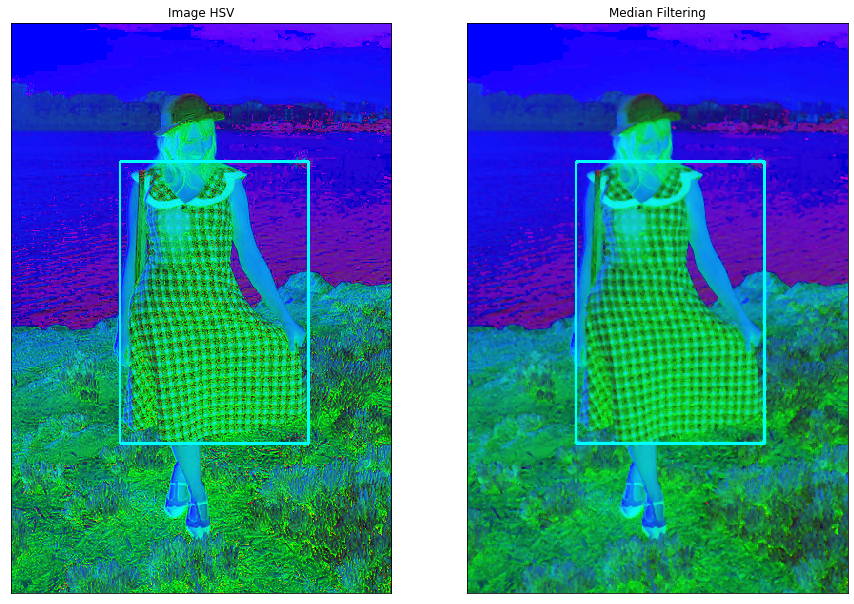

In [14]:
# median filtering
# the dimension of the x and y axis of the kernal.
figure_size = 3
image_enhanced = cv2.medianBlur(image_hsv, figure_size)

plt.figure(figsize=(15, 15))
plt.subplot(1,2,1), plt.imshow(image_hsv),plt.title('Image HSV')
plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(image_enhanced),plt.title('Median Filtering')
plt.xticks([]), plt.yticks([])
plt.show()

### 2.3.3 Cropping
After get the coordinates of the red rectangle in the image and apply median filtering, the image is cropped based on those coordinates.

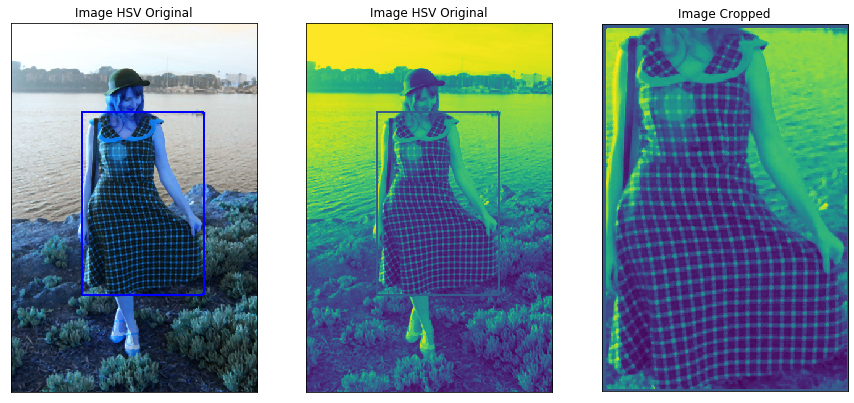

In [15]:
# convert the filtered image back to BGR
image_enhanced_bgr = cv2.cvtColor(image_enhanced, cv2.COLOR_HSV2BGR)

# convert to grayscale that will actually be used for training
image_gray = cv2.cvtColor(image_enhanced_bgr, cv2.COLOR_BGR2GRAY)

# crop the grayscle image along those coordinates
image_cropped = image_gray[y1:y2, x1:x2]

plt.figure(figsize=(15, 15))
plt.subplot(1,3,1), plt.imshow(image_enhanced_bgr),plt.title('Image HSV Original')
plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2), plt.imshow(image_gray),plt.title('Image HSV Original')
plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3), plt.imshow(image_cropped),plt.title('Image Cropped')
plt.xticks([]), plt.yticks([])
plt.show()

### 2.3.4 Resizing
Resize cropped image to 100x100 pixels size.

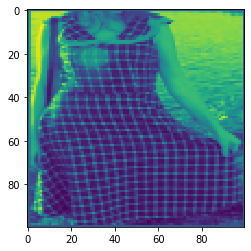

In [16]:
# resize the image to 100x100 pixels size
image_100x100 = cv2.resize(image_cropped, (100, 100))
plt.imshow(image_100x100)

In [17]:
# save image as in form of array of 10000x1
image_arr = image_100x100.flatten()
print(image_arr)
image_arr.shape

[77 76 76 ... 76 76 76]


(10000,)

### 2.3.5 Preprocess All Data
After that, doing preprocess to all data.

In [18]:
def preprocess(img_path):
    # original image
    image = cv2.imread(img_path)

    # convert to HSV for creating a mask
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # create a mask that detects the red rectangular tags present in each image
    mask = cv2.inRange(image_hsv, (0,255,255), (0,255,255))
    
    # get the coordinates of the red rectangle in the image
    if len(np.where(mask != 0)[0]) != 0:
        y1 = min(np.where(mask != 0)[0])
        y2 = max(np.where(mask != 0)[0])
    else:
        y1 = 0                                     
        y2 = len(mask)

    if len(np.where(mask != 0)[1]) != 0:
        x1 = min(np.where(mask != 0)[1])
        x2 = max(np.where(mask != 0)[1])
    else:
        x1 = 0
        x2 = len(mask[0])
        
    # median filtering
    # the dimension of the x and y axis of the kernal.
    figure_size = 3
    image_enhanced = cv2.medianBlur(image_hsv, figure_size)
    
    # convert the filtered image back to BGR
    image_enhanced_bgr = cv2.cvtColor(image_enhanced, cv2.COLOR_HSV2BGR)

    # convert to grayscale that will actually be used for training
    image_gray = cv2.cvtColor(image_enhanced_bgr, cv2.COLOR_BGR2GRAY)

    # crop the grayscle image along those coordinates
    image_cropped = image_gray[y1:y2, x1:x2]
    
    # resize the image to 100x100 pixels size
    image_100x100 = cv2.resize(image_cropped, (100, 100))
    
    # save image as in form of array of 10000x1
    image_arr = image_100x100.flatten()
    return image_arr

In [19]:
preprocessed_img = []

for img_path in df['img_path'] :
    preprocessed_img.append(preprocess(img_path))

X = np.array(preprocessed_img)

print(X)
X.shape

[[ 76  76  76 ... 153 129  76]
 [118  76  76 ...  76  76  76]
 [ 77  76  76 ...  76  76  76]
 ...
 [ 76  76  76 ... 122 114  76]
 [ 76  76  76 ... 196 136  76]
 [ 84  76  76 ...  76  76  76]]


(9669, 10000)

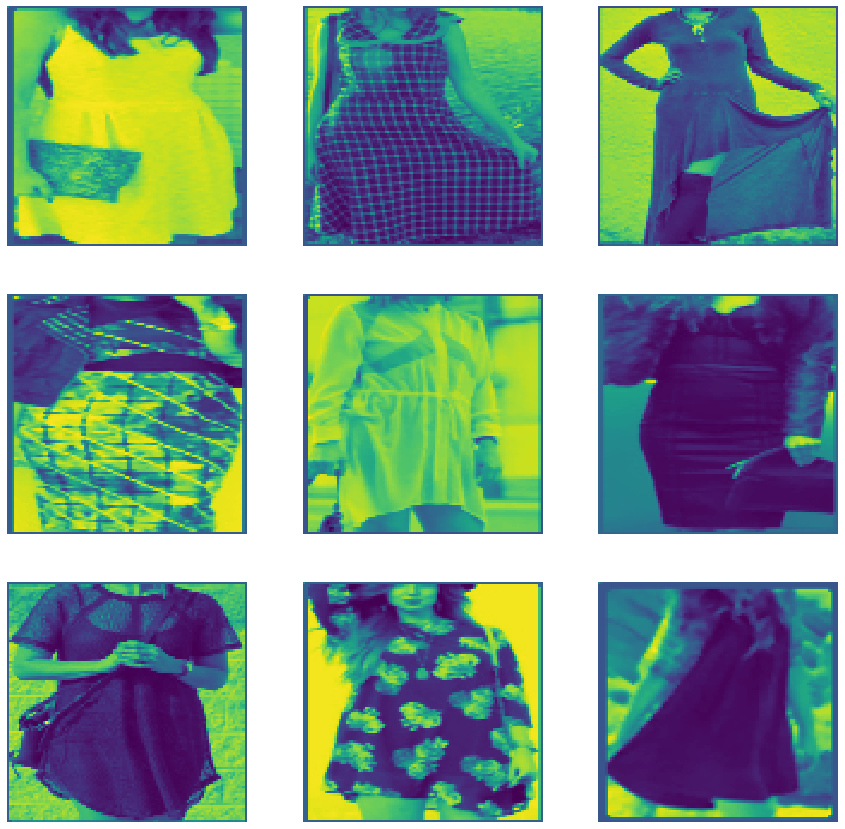

In [20]:
# display some preprocessed images
fig = plt.figure(figsize=(15, 15))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(preprocessed_img[i].reshape(100, 100)), plt.axis('off')
    plt.xticks([]), plt.yticks([])
plt.show()

### 2.4 Split Data
Split data into train, test, and validation set.

In [21]:
# creating target (Y)
# tranform category label into to numerical labels

encoder = LabelEncoder()
Targets = encoder.fit_transform(df['category'])
Targets
Targets.shape

(9669,)

In [22]:
# one-hot encoding 
Y = to_categorical(Targets, num_classes = n_classes)
Y[0:3]
Y.shape

(9669, 17)

In [23]:
# segregation of a test set for testing on the trained model
X_test = X[8000:,]
Y_test = Y[8000:,]

# separation of a validation set from the remaing training set (required for validation while training)
X_train, X_val, Y_train, Y_val = train_test_split(X[:8000,], Y[:8000,], test_size=0.15, random_state=13)

In [24]:
# reshape the input matrices such that each sample is three-dimensional

img_rows, img_cols = 100, 100
input_shape = (img_rows, img_cols, 1)

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(6800, 100, 100, 1)
(1669, 100, 100, 1)
(1200, 100, 100, 1)


### 2.5 Classification using Convolutional Neural Network (CNN)
### 2.5.1 Train Model

In [25]:
# define the CNN Model

model = Sequential()

# 16 Convolutional Layer
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', input_shape = input_shape))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())

# Max Pooling Layer
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

# 32 Convolution Layer
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())

# Max Pooling Layer
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(n_classes, activation='softmax'))

learning_rate = 0.001

model.compile(loss = categorical_crossentropy,
              optimizer = Adam(learning_rate),
              metrics=['accuracy'])

model.summary()

W0519 20:53:23.304852 4522464704 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 98, 98, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        4

In [26]:
# saving the best weight during training 

save_at = "model.hdf5"
save_best = ModelCheckpoint (save_at, monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='max')

In [27]:
# train the CNN model

history = model.fit(X_train, Y_train, 
                    epochs = 30, batch_size = 100, 
                    callbacks=[save_best], verbose=1, 
                    validation_data = (X_val, Y_val))

Train on 6800 samples, validate on 1200 samples
Epoch 1/30
6700/6800 [============================>.] - ETA: 2s - loss: 2.3589 - acc: 0.5543

W0519 20:56:35.403010 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 190s 28ms/sample - loss: 2.3465 - acc: 0.5554 - val_loss: 2.3418 - val_acc: 0.2692
Epoch 2/30
6700/6800 [============================>.] - ETA: 2s - loss: 1.4027 - acc: 0.6428

W0519 20:59:57.605917 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 202s 30ms/sample - loss: 1.4017 - acc: 0.6435 - val_loss: 2.2032 - val_acc: 0.3867
Epoch 3/30
6700/6800 [============================>.] - ETA: 3s - loss: 1.3357 - acc: 0.6597

W0519 21:04:27.446042 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 270s 40ms/sample - loss: 1.3397 - acc: 0.6588 - val_loss: 1.9409 - val_acc: 0.5083
Epoch 4/30
6700/6800 [============================>.] - ETA: 3s - loss: 1.2840 - acc: 0.6701

W0519 21:08:12.042089 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 225s 33ms/sample - loss: 1.2839 - acc: 0.6694 - val_loss: 1.7076 - val_acc: 0.5708
Epoch 5/30
6700/6800 [============================>.] - ETA: 2s - loss: 1.2427 - acc: 0.6778

W0519 21:10:58.073478 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 166s 24ms/sample - loss: 1.2475 - acc: 0.6769 - val_loss: 1.5292 - val_acc: 0.6317
Epoch 6/30
6700/6800 [============================>.] - ETA: 2s - loss: 1.1996 - acc: 0.6831

W0519 21:13:40.372224 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 162s 24ms/sample - loss: 1.1997 - acc: 0.6829 - val_loss: 1.9510 - val_acc: 0.5333
Epoch 7/30
6700/6800 [============================>.] - ETA: 2s - loss: 1.1122 - acc: 0.7027

W0519 21:16:05.723995 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 145s 21ms/sample - loss: 1.1085 - acc: 0.7034 - val_loss: 1.7446 - val_acc: 0.5475
Epoch 8/30
6700/6800 [============================>.] - ETA: 2s - loss: 1.0662 - acc: 0.7130

W0519 21:18:31.097354 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 145s 21ms/sample - loss: 1.0660 - acc: 0.7134 - val_loss: 1.4526 - val_acc: 0.6400
Epoch 9/30
6700/6800 [============================>.] - ETA: 2s - loss: 1.0218 - acc: 0.7234

W0519 21:20:55.939249 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 145s 21ms/sample - loss: 1.0224 - acc: 0.7232 - val_loss: 2.0580 - val_acc: 0.5333
Epoch 10/30
6700/6800 [============================>.] - ETA: 2s - loss: 0.9465 - acc: 0.7387

W0519 21:23:22.606005 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 147s 22ms/sample - loss: 0.9481 - acc: 0.7381 - val_loss: 1.5507 - val_acc: 0.6350
Epoch 11/30
6700/6800 [============================>.] - ETA: 2s - loss: 0.9053 - acc: 0.7500

W0519 21:25:48.523375 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 146s 21ms/sample - loss: 0.9036 - acc: 0.7496 - val_loss: 1.5788 - val_acc: 0.6142
Epoch 12/30
6700/6800 [============================>.] - ETA: 2s - loss: 0.8736 - acc: 0.7566

W0519 21:28:18.570844 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 150s 22ms/sample - loss: 0.8717 - acc: 0.7569 - val_loss: 1.5361 - val_acc: 0.6392
Epoch 13/30
6700/6800 [============================>.] - ETA: 2s - loss: 0.8213 - acc: 0.7622

W0519 21:30:45.612408 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 147s 22ms/sample - loss: 0.8190 - acc: 0.7629 - val_loss: 1.7181 - val_acc: 0.5917
Epoch 14/30
6700/6800 [============================>.] - ETA: 2s - loss: 0.8010 - acc: 0.7684

W0519 21:33:16.955078 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 151s 22ms/sample - loss: 0.7994 - acc: 0.7690 - val_loss: 1.7153 - val_acc: 0.6200
Epoch 15/30
6700/6800 [============================>.] - ETA: 2s - loss: 0.7466 - acc: 0.7815

W0519 21:35:43.339720 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 146s 22ms/sample - loss: 0.7469 - acc: 0.7812 - val_loss: 1.9863 - val_acc: 0.5575
Epoch 16/30
6700/6800 [============================>.] - ETA: 2s - loss: 0.7031 - acc: 0.7890

W0519 21:38:10.634319 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 147s 22ms/sample - loss: 0.7048 - acc: 0.7884 - val_loss: 1.7174 - val_acc: 0.6200
Epoch 17/30
6700/6800 [============================>.] - ETA: 2s - loss: 0.6784 - acc: 0.8004

W0519 21:40:52.140249 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 162s 24ms/sample - loss: 0.6784 - acc: 0.7997 - val_loss: 1.7544 - val_acc: 0.6067
Epoch 18/30
6700/6800 [============================>.] - ETA: 2s - loss: 0.6238 - acc: 0.8110

W0519 21:43:26.816748 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 155s 23ms/sample - loss: 0.6274 - acc: 0.8106 - val_loss: 1.7470 - val_acc: 0.6217
Epoch 19/30
6700/6800 [============================>.] - ETA: 2s - loss: 0.6382 - acc: 0.8076

W0519 21:46:01.970728 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 155s 23ms/sample - loss: 0.6376 - acc: 0.8078 - val_loss: 1.8497 - val_acc: 0.5342
Epoch 20/30
6700/6800 [============================>.] - ETA: 2s - loss: 0.6039 - acc: 0.8222

W0519 21:48:49.088917 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 167s 25ms/sample - loss: 0.6089 - acc: 0.8212 - val_loss: 1.9681 - val_acc: 0.6158
Epoch 21/30
6700/6800 [============================>.] - ETA: 2s - loss: 0.5868 - acc: 0.8200

W0519 21:51:22.489557 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 153s 23ms/sample - loss: 0.5826 - acc: 0.8213 - val_loss: 2.0398 - val_acc: 0.5442
Epoch 22/30
6700/6800 [============================>.] - ETA: 2s - loss: 0.5603 - acc: 0.8288

W0519 21:53:50.490481 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 148s 22ms/sample - loss: 0.5604 - acc: 0.8287 - val_loss: 3.2383 - val_acc: 0.4383
Epoch 23/30
6700/6800 [============================>.] - ETA: 2s - loss: 0.5348 - acc: 0.8354

W0519 21:56:17.547389 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 147s 22ms/sample - loss: 0.5361 - acc: 0.8347 - val_loss: 2.1876 - val_acc: 0.5233
Epoch 24/30
6700/6800 [============================>.] - ETA: 2s - loss: 0.5183 - acc: 0.8391

W0519 21:58:53.688111 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 156s 23ms/sample - loss: 0.5195 - acc: 0.8391 - val_loss: 2.0407 - val_acc: 0.5975
Epoch 25/30
6700/6800 [============================>.] - ETA: 2s - loss: 0.5104 - acc: 0.8460

W0519 22:01:32.832485 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 159s 23ms/sample - loss: 0.5086 - acc: 0.8469 - val_loss: 1.9021 - val_acc: 0.5783
Epoch 26/30
6700/6800 [============================>.] - ETA: 2s - loss: 0.5137 - acc: 0.8387

W0519 22:04:06.665225 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 154s 23ms/sample - loss: 0.5130 - acc: 0.8390 - val_loss: 1.8826 - val_acc: 0.6442
Epoch 27/30
6700/6800 [============================>.] - ETA: 2s - loss: 0.4743 - acc: 0.8473

W0519 22:06:48.764399 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 162s 24ms/sample - loss: 0.4747 - acc: 0.8471 - val_loss: 1.7618 - val_acc: 0.6383
Epoch 28/30
6700/6800 [============================>.] - ETA: 2s - loss: 0.4565 - acc: 0.8579

W0519 22:09:28.326776 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 160s 23ms/sample - loss: 0.4544 - acc: 0.8581 - val_loss: 2.1864 - val_acc: 0.5350
Epoch 29/30
6700/6800 [============================>.] - ETA: 2s - loss: 0.4313 - acc: 0.8627

W0519 22:11:58.347653 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 150s 22ms/sample - loss: 0.4334 - acc: 0.8625 - val_loss: 1.9966 - val_acc: 0.5950
Epoch 30/30
6700/6800 [============================>.] - ETA: 2s - loss: 0.4589 - acc: 0.8555

W0519 22:14:29.224170 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 151s 22ms/sample - loss: 0.4616 - acc: 0.8541 - val_loss: 1.9174 - val_acc: 0.5925


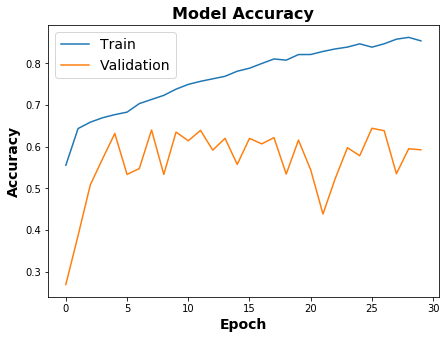

In [28]:
# plot accuracy
plt.figure(figsize=(7, 5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy', weight='bold', fontsize=16)
plt.ylabel('Accuracy', weight='bold', fontsize=14)
plt.xlabel('Epoch', weight='bold', fontsize=14)
plt.legend(['Train', 'Validation'], loc='upper left', prop={'size': 14})

### 2.5.2 Evaluating Performace over Test-set

In [29]:
# run model on the held-out test set

# model = load_model('model.hdf5')
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

[1.8814440722091246, 0.583583]
Accuracy over the test set: 
  58.36 %


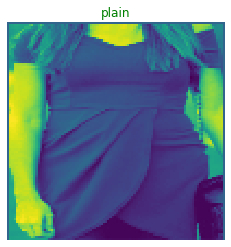

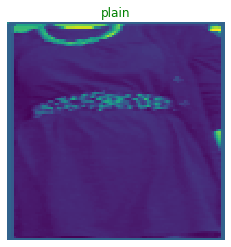

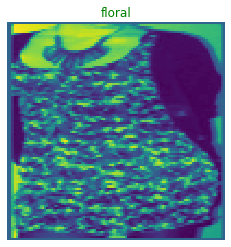

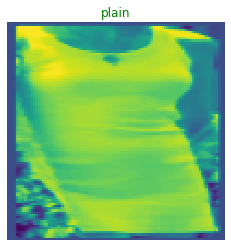

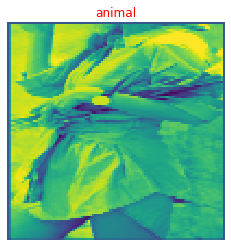

In [30]:
Y_pred = np.round(model.predict(X_test))

np.random.seed(87)
for rand_num in np.random.randint(0, len(Y_test), 5):
    plt.figure()
    plt.imshow(X_test[rand_num].reshape(100, 100)), plt.axis('off')
    if np.where(Y_pred[rand_num] == 1)[0].sum() == np.where(Y_test[rand_num] == 1)[0].sum():
        plt.title(encoder.classes_[np.where(Y_pred[rand_num] == 1)[0].sum()], color='g')
    else :
        plt.title(encoder.classes_[np.where(Y_pred[rand_num] == 1)[0].sum()], color='r')

----
I want to compare the accuration of preprocessed images with unpreprocessed ones.

In [31]:
img_list = []

for img_path in df['img_path'] :
    # original image
    image = cv2.imread(img_path)
    
    # convert to grayscale that will actually be used for training
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # resize the image to 100x100 pixels size
    image_100x100 = cv2.resize(image_gray, (100, 100))
    
    # save image as in form of array of 10000x1
    image_arr = image_100x100.flatten()
    
    img_list.append(image_arr)

X = np.array(img_list)

print(X)
X.shape

[[181 216 218 ... 206 205 203]
 [160 150 157 ...  51  44  45]
 [255 255 255 ...  63  25  32]
 ...
 [235 232 203 ... 154 146 179]
 [179 239 239 ... 182 179 188]
 [117 200  75 ...  80  73  73]]


(9669, 10000)

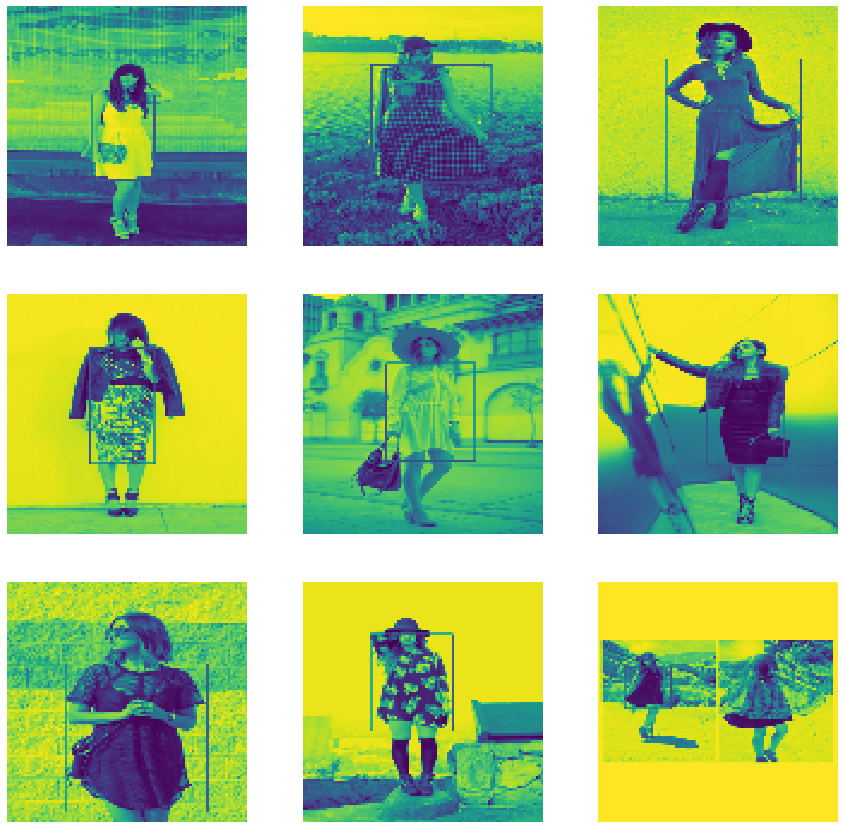

In [32]:
# display some images
fig = plt.figure(figsize=(15, 15))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(img_list[i].reshape(100, 100)), plt.axis('off')
    plt.xticks([]), plt.yticks([])
plt.show()

### 2.4 Split Data

In [33]:
# creating target (Y)
# tranform category label into to numerical labels

encoder = LabelEncoder()
Targets = encoder.fit_transform(df['category'])
Targets
Targets.shape

(9669,)

In [34]:
# one-hot encoding 
Y = to_categorical(Targets, num_classes = n_classes)
Y[0:3]
Y.shape

(9669, 17)

In [35]:
# segregation of a test set for testing on the trained model
X_test = X[8000:,]
Y_test = Y[8000:,]

# separation of a validation set from the remaing training set (required for validation while training)
X_train, X_val, Y_train, Y_val = train_test_split(X[:8000,], Y[:8000,], test_size=0.15, random_state=13)

In [36]:
# reshape the input matrices such that each sample is three-dimensional

img_rows, img_cols = 100, 100
input_shape = (img_rows, img_cols, 1)

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(6800, 100, 100, 1)
(1669, 100, 100, 1)
(1200, 100, 100, 1)


### 2.5 Classification using Convolutional Neural Network (CNN)
### 2.5.1 Train Model

In [37]:
# define the CNN Model

model = Sequential()

# 16 Convolutional Layer
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', input_shape = input_shape))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())

# Max Pooling Layer
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

# 32 Convolution Layer
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())

# Max Pooling Layer
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(n_classes, activation='softmax'))

learning_rate = 0.001

model.compile(loss = categorical_crossentropy,
              optimizer = Adam(learning_rate),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 16)        160       
_________________________________________________________________
batch_normalization_4 (Batch (None, 98, 98, 16)        64        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 96, 96, 16)        2320      
_________________________________________________________________
batch_normalization_5 (Batch (None, 96, 96, 16)        64        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 32)       

In [38]:
# saving the best weight during training 

save_at = "model.hdf5"
save_best = ModelCheckpoint (save_at, monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='max')

In [39]:
# train the CNN model

history = model.fit(X_train, Y_train, 
                    epochs = 15, batch_size = 100, 
                    callbacks=[save_best], verbose=1, 
                    validation_data = (X_val, Y_val))

Train on 6800 samples, validate on 1200 samples
Epoch 1/15
6700/6800 [============================>.] - ETA: 2s - loss: 2.6099 - acc: 0.4857

W0519 22:47:01.143594 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 158s 23ms/sample - loss: 2.5956 - acc: 0.4872 - val_loss: 2.1735 - val_acc: 0.5458
Epoch 2/15
6700/6800 [============================>.] - ETA: 2s - loss: 1.6186 - acc: 0.5628

W0519 22:49:34.951836 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 154s 23ms/sample - loss: 1.6176 - acc: 0.5625 - val_loss: 2.0400 - val_acc: 0.5167
Epoch 3/15
6700/6800 [============================>.] - ETA: 2s - loss: 1.5328 - acc: 0.5979

W0519 22:52:04.007259 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 149s 22ms/sample - loss: 1.5329 - acc: 0.5976 - val_loss: 1.7475 - val_acc: 0.5658
Epoch 4/15
6700/6800 [============================>.] - ETA: 2s - loss: 1.4365 - acc: 0.6104

W0519 22:54:35.143792 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 151s 22ms/sample - loss: 1.4370 - acc: 0.6109 - val_loss: 1.6212 - val_acc: 0.5600
Epoch 5/15
6700/6800 [============================>.] - ETA: 2s - loss: 1.3828 - acc: 0.6279

W0519 22:57:09.333419 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 154s 23ms/sample - loss: 1.3852 - acc: 0.6281 - val_loss: 1.5066 - val_acc: 0.6033
Epoch 6/15
6700/6800 [============================>.] - ETA: 2s - loss: 1.3203 - acc: 0.6415

W0519 22:59:41.001174 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 152s 22ms/sample - loss: 1.3188 - acc: 0.6428 - val_loss: 1.5194 - val_acc: 0.6075
Epoch 7/15
6700/6800 [============================>.] - ETA: 2s - loss: 1.2800 - acc: 0.6515

W0519 23:02:11.723124 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 151s 22ms/sample - loss: 1.2814 - acc: 0.6509 - val_loss: 1.5565 - val_acc: 0.5900
Epoch 8/15
6700/6800 [============================>.] - ETA: 2s - loss: 1.2158 - acc: 0.6585

W0519 23:04:40.648953 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 149s 22ms/sample - loss: 1.2152 - acc: 0.6594 - val_loss: 1.5443 - val_acc: 0.6025
Epoch 9/15
6700/6800 [============================>.] - ETA: 2s - loss: 1.1321 - acc: 0.6794

W0519 23:07:09.574223 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 149s 22ms/sample - loss: 1.1346 - acc: 0.6791 - val_loss: 1.8171 - val_acc: 0.5675
Epoch 10/15
6700/6800 [============================>.] - ETA: 2s - loss: 1.0800 - acc: 0.6931

W0519 23:09:39.546411 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 150s 22ms/sample - loss: 1.0833 - acc: 0.6928 - val_loss: 1.6973 - val_acc: 0.5842
Epoch 11/15
6700/6800 [============================>.] - ETA: 2s - loss: 1.0391 - acc: 0.6990

W0519 23:12:08.757906 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 149s 22ms/sample - loss: 1.0376 - acc: 0.6994 - val_loss: 1.7703 - val_acc: 0.5950
Epoch 12/15
6700/6800 [============================>.] - ETA: 2s - loss: 0.9649 - acc: 0.7210

W0519 23:14:37.835668 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 149s 22ms/sample - loss: 0.9659 - acc: 0.7207 - val_loss: 1.8638 - val_acc: 0.5725
Epoch 13/15
6700/6800 [============================>.] - ETA: 2s - loss: 0.9316 - acc: 0.7287

W0519 23:17:06.535582 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 149s 22ms/sample - loss: 0.9304 - acc: 0.7287 - val_loss: 1.8447 - val_acc: 0.5608
Epoch 14/15
6700/6800 [============================>.] - ETA: 2s - loss: 0.8902 - acc: 0.7376

W0519 23:19:37.917124 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 151s 22ms/sample - loss: 0.8893 - acc: 0.7381 - val_loss: 1.8248 - val_acc: 0.5800
Epoch 15/15
6700/6800 [============================>.] - ETA: 2s - loss: 0.8554 - acc: 0.7493

W0519 23:22:10.065549 4522464704 callbacks.py:989] Can save best model only with val_accuracy available, skipping.


6800/6800 [==============================] - 152s 22ms/sample - loss: 0.8542 - acc: 0.7500 - val_loss: 2.0271 - val_acc: 0.5583


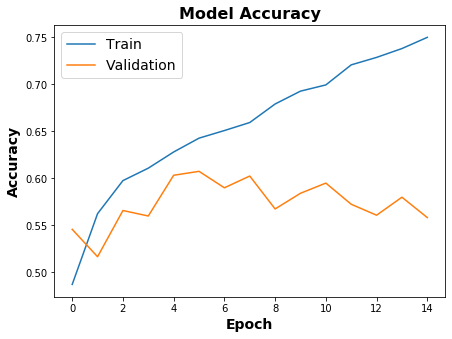

In [40]:
# plot accuracy
plt.figure(figsize=(7, 5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy', weight='bold', fontsize=16)
plt.ylabel('Accuracy', weight='bold', fontsize=14)
plt.xlabel('Epoch', weight='bold', fontsize=14)
plt.legend(['Train', 'Validation'], loc='upper left', prop={'size': 14})

### 2.5.2 Evaluating Performace over Test-set

In [41]:
# run model on the held-out test set

# model = load_model('model.hdf5')
score = model.evaluate(X_test, Y_test, verbose=0)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

Accuracy over the test set: 
  56.32 %


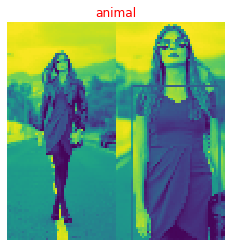

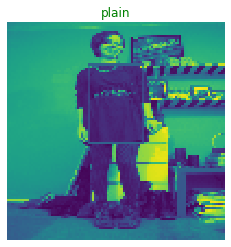

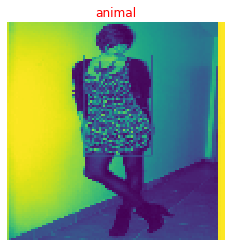

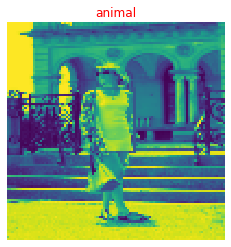

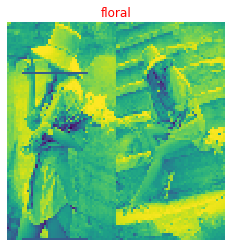

In [42]:
Y_pred = np.round(model.predict(X_test))

np.random.seed(87)
for rand_num in np.random.randint(0, len(Y_test), 5):
    plt.figure()
    plt.imshow(X_test[rand_num].reshape(100, 100)), plt.axis('off')
    if np.where(Y_pred[rand_num] == 1)[0].sum() == np.where(Y_test[rand_num] == 1)[0].sum():
        plt.title(encoder.classes_[np.where(Y_pred[rand_num] == 1)[0].sum()], color='g')
    else :
        plt.title(encoder.classes_[np.where(Y_pred[rand_num] == 1)[0].sum()], color='r')

## 3. Discussion and Conclusion

Based on the evaluation results above, **the preprocessed image gets higher accuracy compared to unpreprocessed image**, with same parameters, that is:
* Split data:
    * Train set: **6800**
    * Test set: **1669**
    * Validation set: **1200**
* Epoch: **15**
* Batch Size: **100**


| Scenario | Accuracy | 
|---|---|
|With preprocess | 58.36 % |
|Without preprocess | 56.32 % |

Based on the plot accuracy graphs, the model has **high training accuracy and very low validation**. This case is probably known as **overfitting**. Overfitting is such a problem because the evaluation of machine learning algorithms on training data is different from the evaluation we actually care the most about, namely how well the algorithm performs on unseen data.

There are two important techniques that you can use when evaluating machine learning algorithms to limit overfitting:

1. Use a resampling technique to estimate model accuracy.
2. Hold back a validation dataset.

The most popular resampling technique is **k-fold cross validation**. It allows you to train and test your model k-times on different subsets of training data and build up an estimate of the performance of a machine learning model on unseen data.

A validation dataset is simply a subset of your training data that you hold back from your machine learning algorithms until the very end of your project. After you have selected and tuned your machine learning algorithms on your training dataset you can evaluate the learned models on the validation dataset to get a final objective idea of how the models might perform on unseen data.

## References
* https://www.kaggle.com/nitinsss/fashion-dataset-with-over-15000-labelled-images
* https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/